In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: <Good Performance> Select Stocks For Inclusion in Portfolio
selected_stocks = ["FCX","GOOG","F"]

In [3]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks)

[0] Retrieving Stock Data: FCX
[1] Retrieving Stock Data: GOOG
[2] Retrieving Stock Data: F

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
F           0.0120
FCX         0.0629
GOOG        0.9251
Return      0.1242
Sharpe      0.1206
Variance    0.2172
Name: 1305, dtype: float64


In [4]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: F 	Portfolio Weight: 0.012
                   F
Date                
2014-01-03  0.000054
2014-01-06  0.000054
2014-01-07 -0.000155
2014-01-08  0.000124
2014-01-09  0.000229

Ticker: FCX 	Portfolio Weight: 0.0629
                 FCX
Date                
2014-01-03 -0.000520
2014-01-06 -0.000508
2014-01-07 -0.000615
2014-01-08 -0.000794
2014-01-09 -0.000857

Ticker: GOOG 	Portfolio Weight: 0.9251
                GOOG
Date                
2014-03-28  0.002531
2014-03-31 -0.005003
2014-04-01  0.016772
2014-04-02 -0.000261
2014-04-03  0.004460

[Historic] Portfolio Performance:
                    F       FCX      GOOG      RTNp
Date                                              
2014-03-28  0.000156  0.000867  0.002531  0.003555
2014-03-31  0.000116  0.000401 -0.005003 -0.004486
2014-04-01  0.000541 -0.000286  0.016772  0.017028
2014-04-02  0.000103  0.000760 -0.000261  0.000601
2014-04-03 -0.000051  0.000170  0.004460  0.004578


In [5]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                   F       FCX      GOOG      RTNp      RTNm    Excess  \
Date                                                                     
2014-03-28  0.000156  0.000867  0.002531  0.003555 -0.026811  0.030366   
2014-03-31  0.000116  0.000401 -0.005003 -0.004486  0.019605 -0.024091   
2014-04-01  0.000541 -0.000286  0.016772  0.017028 -0.008794  0.025821   
2014-04-02  0.000103  0.000760 -0.000261  0.000601  0.001535 -0.000934   
2014-04-03 -0.000051  0.000170  0.004460  0.004578 -0.007698  0.012277   

                 Compare  
Date                      
2014-03-28    Outperform  
2014-03-31  Underperform  
2014-04-01    Outperform  
2014-04-02  Underperform  
2014-04-03    Outperform  


In [6]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,F,FCX,GOOG,RTNp,RTNm,Excess,Compare
Date,,,,,,,
2014-03-28,0.000156,0.000867,0.002531,0.003555,-0.026811,0.030366,Outperform
2014-03-31,0.000116,0.000401,-0.005003,-0.004486,0.019605,-0.024091,Underperform
2014-04-01,0.000541,-0.000286,0.016772,0.017028,-0.008794,0.025821,Outperform
2014-04-02,0.000103,0.000760,-0.000261,0.000601,0.001535,-0.000934,Underperform
2014-04-03,-0.000051,0.000170,0.004460,0.004578,-0.007698,0.012277,Outperform


In [7]:
# [View] Evaluation Sample Size
pfolio_eval.count()

F          1006
FCX        1006
GOOG       1006
RTNp       1006
RTNm       1006
Excess     1006
Compare    1006
dtype: int64

In [8]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5099
Underperform    0.4901
Name: Compare, dtype: float64

In [9]:
pfolio_eval["RTNp"].head(10)

Date
2014-03-28    0.003555
2014-03-31   -0.004486
2014-04-01    0.017028
2014-04-02    0.000601
2014-04-03    0.004578
2014-04-04   -0.044593
2014-04-07   -0.009135
2014-04-08    0.029493
2014-04-09    0.015752
2014-04-10   -0.040471
Name: RTNp, dtype: float64

In [10]:
xaxis_dates = pfolio_eval.reset_index()["Date"]
xmin = xaxis_dates.iloc[0]
xmax = xaxis_dates.iloc[-1]

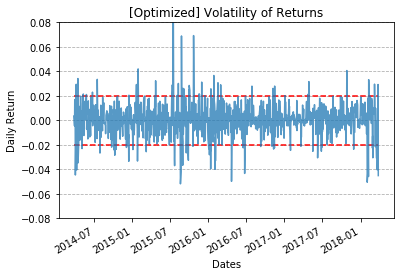

In [11]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(alpha=.75)
plt.title("[Optimized] Volatility of Returns")
plt.xlabel("Dates")
plt.ylabel("Daily Return")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

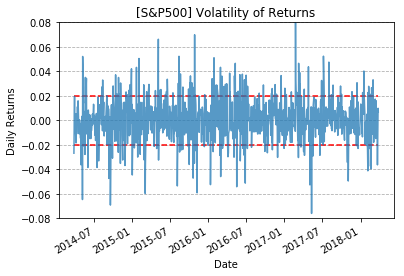

In [12]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(alpha=.75)
plt.title("[S&P500] Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [ ]:
# Calculate Portfolio Beta -- Show The Correlation of Returns
# Explanation as to Why On an Absolute Basis Portfolio Underpeforms Only Slightly


In [ ]:
rtn_df = pfolio_eval["RTNp"].apply(lambda x: x + 1).reset_index()

In [ ]:
rtn_df.head()

In [ ]:
rtn_df.iloc[0]["Date"].date()

In [ ]:
mkt_val = [(row[1][0].date(), row[1][1]) for row in rtn_df.iterrows()]

In [ ]:
mkt_val[:10]

In [ ]:
pfolio_eval.describe()